<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\jiayi\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\jiayi\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\jiayi\.julia\environments\v1.8\Manifest.toml`


In [3]:
import SpecialFunctions
import Plots
using SpecialFunctions

In [4]:
function sample_gaussian(μ,σ,n)
    gauss=[]
    x=rand(n)
    for i in x
        sample=(erfinv(2*i-1)*sqrt(2)*σ)+μ
        push!(gauss,sample)
    end
    gauss
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots","Distributions"])
using Distributions, SpecialFunctions, Plots

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = HTTP/1.1 502 Bad Gateway while requesting https://pkg.julialang.org/registries
└ @ Pkg.Registry C:\workdir\usr\share\julia\stdlib\v1.8\Pkg\src\Registry\Registry.jl:68
    Updating registry at `C:\Users\jiayi\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\jiayi\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\jiayi\.julia\environments\v1.8\Manifest.toml`


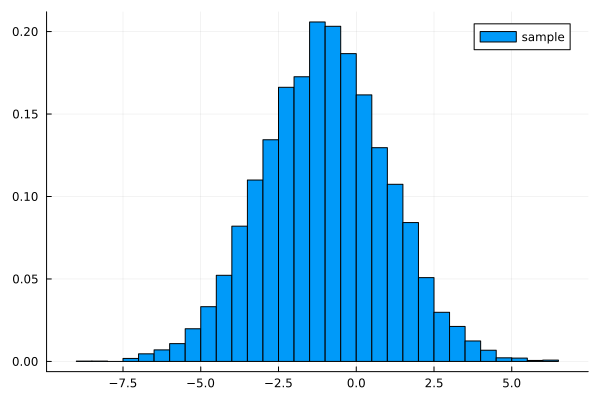

In [5]:
data=sample_gaussian(-1,2,10000)
histogram(data,label="sample",normalize=true)

In [6]:
x=-8:0.001:6
nor=Distributions.Normal(-1,2)
pdf=Distributions.pdf.(nor,x)

14001-element Vector{Float64}:
 0.0004363413475228801
 0.00043710555878045894
 0.00043787099901516186
 0.00043863766999606706
 0.0004394055734944224
 0.0004401747112836551
 0.00044094508513936836
 0.0004417166968393453
 0.0004424895481635528
 0.0004432636408941397
 0.0004440389768154412
 0.00044481555771398246
 0.0004455933853784757
 ⋮
 0.00044481555771398246
 0.0004440389768154412
 0.0004432636408941397
 0.0004424895481635528
 0.0004417166968393453
 0.00044094508513936836
 0.0004401747112836551
 0.0004394055734944224
 0.00043863766999606706
 0.00043787099901516186
 0.00043710555878045894
 0.0004363413475228801

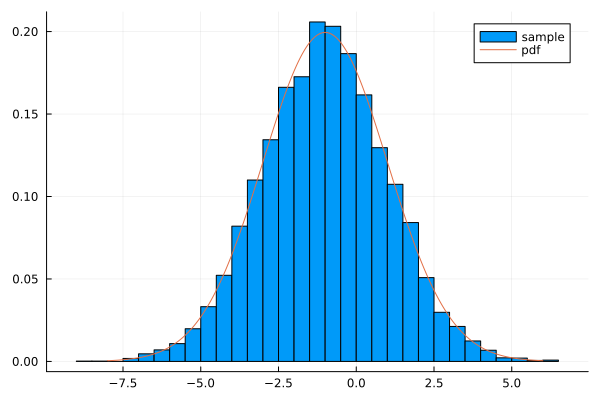

In [7]:
plot!(x,pdf,label="pdf")